In [1]:
import sys 
sys.path.append("../")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set dest_path to save plot
def plot_polar(df, dest_path=None):

    plt.figure(num=None, figsize=(10,8), dpi = 100, facecolor='w', edgecolor='b')

    categories=list(df)[1:]
    N = len(categories)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, polar=True)
    
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], categories)
    ax.set_facecolor('lightgrey')
    
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="grey", size=7)
    plt.ylim(0,1)

    line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':','-', '--', '-.', ':','-', '--', '-.', ':',] 
    for i in range(0,len(df)):

        values=df.loc[i].drop('idx').values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle=line_styles[i], label=df['idx'].loc[i])
        #ax.fill(angles, values, 'b', alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    if dest_path is not None:
        plt.savefig(dest_path, dpi=300)    

In [3]:
df = pd.DataFrame({
'idx':     ['DenseNet121'],
'Accuracy':  [0.74],
'F1':        [0.40],
'Recall':    [0.55],
'Precision': [0.46],
'AUROC':     [0.79],
})

#plot_polar(df, dest_path=None)

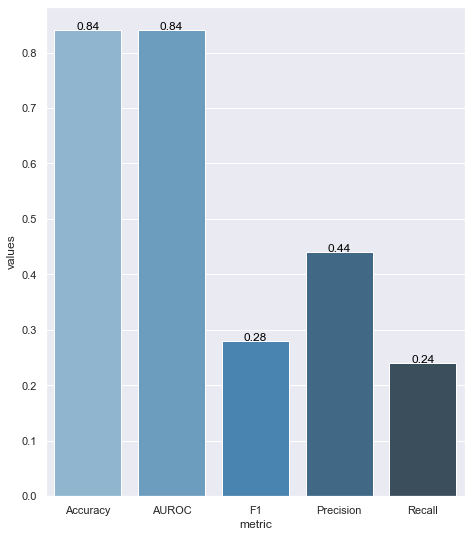

In [4]:
df = pd.DataFrame({
'metric':     ["Accuracy", 'AUROC',  "F1", 'Precision', 'Recall'],
'values':  [0.84, 0.84, 0.28, 0.44, 0.24],
})

sns.set(rc={'figure.figsize':(7.5,9)})
ax = sns.barplot(x='metric', y='values', data=df, palette="Blues_d")

for index, row in df.iterrows():
    ax.text(row.name, row.values[1], row.values[1], color='black', ha="center")

plt.savefig('../figures/barplot_chexpert_weigted_unweighted', dpi=300)

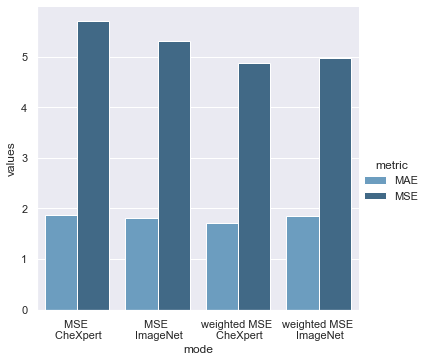

In [5]:
df = pd.DataFrame({
'metric': ["MAE", "MSE","MAE", "MSE","MAE", "MSE","MAE", "MSE"],
'values': [1.87, 5.7, 1.81, 5.3, 1.72, 4.87, 1.84, 4.98],
'mode': ['MSE \n CheXpert', 'MSE \n CheXpert','MSE \n ImageNet', 'MSE \n ImageNet','weighted MSE \n CheXpert', 'weighted MSE \n CheXpert','weighted MSE \n ImageNet', 'weighted MSE \n ImageNet']
})

ax = sns.factorplot(x='mode', y='values', hue='metric', data=df, kind='bar', palette="Blues_d")
#plt.figure(figsize=(20,8))
plt.savefig('../figures/barplot_brixia', dpi=300)

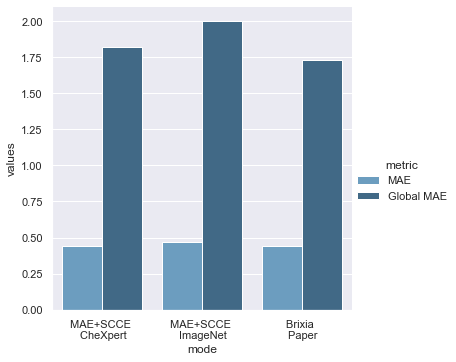

In [6]:
df = pd.DataFrame({
'metric': ["MAE", "Global MAE", "MAE", "Global MAE", "MAE", "Global MAE"],
'values': [0.44, 1.82, 0.47, 2, 0.441, 1.728],
'mode': ['MAE+SCCE \n CheXpert', 'MAE+SCCE \n CheXpert','MAE+SCCE \n ImageNet', 'MAE+SCCE \n ImageNet','Brixia \n Paper', 'Brixia \n Paper']
})

ax = sns.factorplot(x='mode', y='values', hue='metric', data=df, kind='bar', palette="Blues_d")
#plt.figure(figsize=(20,8))
plt.savefig('../figures/barplot_brixia_paper', dpi=300)